In [1]:
import keras
from keras import layers
from keras import callbacks
from keras import models
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import os


Using TensorFlow backend.


In [2]:
os.getcwd()

'/Users/tudou/Downloads/project/tensor_flow_practice/nlp/time_sries'

In [3]:
data=pd.read_csv('./data_stocks.csv')
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [4]:
# 将日期行移除
datas = data.values[:, 1:]
train_datas = datas[:int(len(datas) * 0.8), :]
test_datas = datas[int(len(datas) * 0.8):, :]


In [5]:
# 数据处理
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_datas)
train_datas = scaler.transform(train_datas)
test_datas = scaler.transform(test_datas)


In [30]:
# 模型参数
batch_size=256
seq_len=5
epochs=10

# 异步预测

In [52]:
# 训练数据生成
train1 = np.array([train_datas[i:i + seq_len, 0] for i in range(len(train_datas) - seq_len)])[:, :, np.newaxis]
label1 = np.array([train_datas[i + seq_len, 0:1] for i in range(len(train_datas) - seq_len)])
test1 = np.array([test_datas[i:i + seq_len, 0] for i in range(len(test_datas) - seq_len)])[:, :, np.newaxis]
t_label1 = np.array([test_datas[i + seq_len, 0:1] for i in range(len(test_datas) - seq_len)])
train1.shape, label1.shape


((33007, 5, 1), (33007, 1))

In [53]:
# 模型建立
input=layers.Input((seq_len,1))
h=layers.LSTM(64,activation='relu')(input)
output=layers.Dense(1)(h)
model=models.Model(inputs=input,outputs=output)

In [54]:
model.compile('adam',loss='mse')
model.fit(train1,label1,batch_size=batch_size,epochs=epochs,validation_split=0.1,shuffle=False)

Train on 29706 samples, validate on 3301 samples
Epoch 1/10
29706/29706 [==============================] - 2s 69us/step - loss: 0.1092 - val_loss: 0.0044
Epoch 2/10
29706/29706 [==============================] - 1s 32us/step - loss: 0.0203 - val_loss: 1.2765e-04
Epoch 3/10
29706/29706 [==============================] - 1s 33us/step - loss: 7.4951e-04 - val_loss: 2.4271e-04
Epoch 4/10
29706/29706 [==============================] - 1s 33us/step - loss: 4.6285e-04 - val_loss: 2.2469e-04
Epoch 5/10
29706/29706 [==============================] - 1s 33us/step - loss: 3.5812e-04 - val_loss: 1.7287e-04
Epoch 6/10
29706/29706 [==============================] - 1s 33us/step - loss: 3.0409e-04 - val_loss: 1.2270e-04
Epoch 7/10
29706/29706 [==============================] - 1s 32us/step - loss: 2.6567e-04 - val_loss: 9.1635e-05
Epoch 8/10
29706/29706 [==============================] - 1s 33us/step - loss: 2.2492e-04 - val_loss: 7.8278e-05
Epoch 9/10
29706/29706 [==============================] - 1

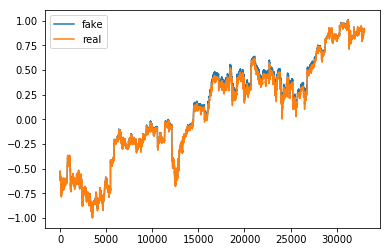

In [55]:
# 训练集拟合度
y_train1=model.predict(train1)
plt.plot(y_train1,label='fake')
plt.plot(label1,label='real')
plt.legend()

In [ ]:
# 测试集拟合度
y_test1=model.predict(test1)
plt.plot(y_test1,label='fake')
plt.plot(t_label1,label='real')
plt.legend()


100%|██████████| 5000/5000 [00:07<00:00, 699.43it/s]


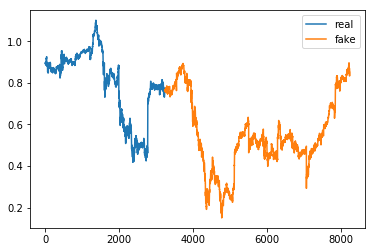

In [58]:
# 预测
import tqdm
epoch=5000
for i in tqdm.tqdm(range(epoch)):
    x=t_label1[-5:][np.newaxis,:,:]
    y_=model.predict(x)
    t_lable1=np.append(t_label1,y)
plt.plot(t_label1[:-epoch],label='real')
plt.plot(list(range(len(t_label1)))[-epoch:],t_label1[-epoch:],label='fake')
plt.legend()

# 同步预测

In [17]:
# 训练数据生成
seq_len=20
train2=np.array([train_datas[i:i+seq_len,:] for i in range(len(train_datas)-seq_len)])
label2=np.array([train_datas[i+seq_len,0:1] for i in range(len(train_datas)-seq_len)])
test2=np.array([test_datas[i:i+seq_len,:] for i in range(len(test_datas)-seq_len)])
t_label2=np.array([test_datas[i+seq_len,0:1] for i in range(len(test_datas)-seq_len)])
train2.shape,label2.shape

((32992, 20, 500), (32992, 1))

In [18]:
# 模型建立
input=layers.Input((seq_len,501))
h=layers.LSTM(128,activation='relu')(input)
output=layers.Dense(1,activation='sigmoid')(h)
model=models.Model(inputs=input,outputs=output)

In [19]:
model.compile('adam',loss='mse')
model.fit(train2,label2,batch_size=batch_size,epochs=epochs,validation_split=0.1,shuffle=False)

Train on 29692 samples, validate on 3300 samples
Epoch 1/10
29692/29692 [==============================] - 31s 1ms/step - loss: 0.1318 - val_loss: 0.0075
Epoch 2/10
29692/29692 [==============================] - 25s 850us/step - loss: 0.1158 - val_loss: 0.0029
Epoch 3/10
29692/29692 [==============================] - 25s 851us/step - loss: 0.1154 - val_loss: 0.0079
Epoch 4/10
29692/29692 [==============================] - 25s 840us/step - loss: 0.1163 - val_loss: 0.0034
Epoch 5/10
29692/29692 [==============================] - 26s 859us/step - loss: 0.1171 - val_loss: 0.0065
Epoch 6/10
29692/29692 [==============================] - 26s 880us/step - loss: 0.1347 - val_loss: 0.0085
Epoch 7/10
29692/29692 [==============================] - 25s 848us/step - loss: 0.1174 - val_loss: 0.0031
Epoch 8/10
29692/29692 [==============================] - 25s 846us/step - loss: 0.1302 - val_loss: 0.0035
Epoch 9/10
29692/29692 [==============================] - 25s 843us/step - loss: 0.1167 - val_los

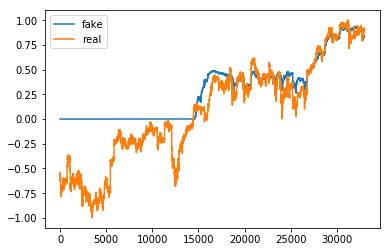

In [22]:
y_train2=model.predict(train2)
plt.plot(y_train2,label='fake')
plt.plot(label2,label='real')
plt.legend()

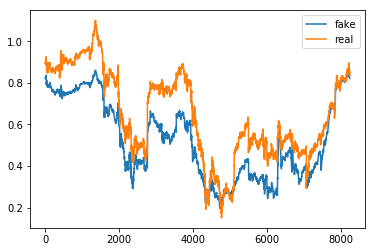

In [23]:
y_test2=model.predict(test2)
plt.plot(y_test2,label='fake')
plt.plot(t_label2,label='real')
plt.legend()